# Deteccion de Fraude Machine Learning

**Importamos los paquetes necesarios**

In [2]:
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from scipy import stats

**Importamos los datos**

In [42]:
INPUT_ZIP = "../data/in/Fraud_Detction_Dataset.zip"  # Directorio del zip
OUTPUT_FOLDER = "../data/in/"  # Directorio de destino
TRAIN_FILENAME = "creditcard.csv"  # Nombre del fichero de entrenamiento

def fetch_data(input_path=INPUT_ZIP, output_dir=OUTPUT_FOLDER):
    
    # Comprobación de que el directorio de destino existe
    os.makedirs(output_dir, exist_ok=True)

    # Descomprime el archivo ZIP en caso de que no haya ningún csv en la carpeta
    if(len([file for file in os.listdir(output_dir) if file.endswith('.csv')]) == 0):
        with zipfile.ZipFile(input_path, 'r') as zip_ref:
            zip_ref.extractall(output_dir)


def load_data(directory=OUTPUT_FOLDER, filename=TRAIN_FILENAME):

    # Construir la ruta completa al archivo CSV
    file_path = os.path.join(directory, filename)

    # Verificar si el archivo existe
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"El archivo {filename} no se encuentra en el directorio {directory}")

    # Leer el archivo CSV en un DataFrame
    return pd.read_csv(file_path)

fetch_data()
df = load_data()
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df['Class'] = df['Class'].astype('object')

In [8]:
def graficos(df):
    df.hist(figsize=(20, 20), bins=50)
    plt.tight_layout()
    plt.show()

    # Crear boxplots para todas las columnas numéricas
    df.select_dtypes(include=['float64']).plot(kind='box', subplots=True, layout=(6, 5), figsize=(20, 20), sharex=False, sharey=False)
    plt.tight_layout()
    plt.show()


In [ ]:
graficos(df)

In [9]:
# Filtrar los datos eliminando los valores atípicos excepto para 'Class' igual a 1

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df[
    (df['Class'] == 1) | 
    ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
]

# Mostrar el nuevo DataFrame sin valores atípicos
df_cleaned

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284796,172780.0,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,0.190241,-0.249058,0.666458,...,0.144008,0.634646,-0.042114,-0.053206,0.316403,-0.461441,0.018265,-0.041068,60.00,0
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0


In [11]:
print(f'Dataset Original {df.shape}')
print(f'Dataset sin Outliers {df_cleaned.shape}')

Dataset Original (284807, 31)
Dataset sin Outliers (146811, 31)


In [12]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [13]:
df_cleaned['Class'].value_counts()

Class
0    146319
1       492
Name: count, dtype: int64

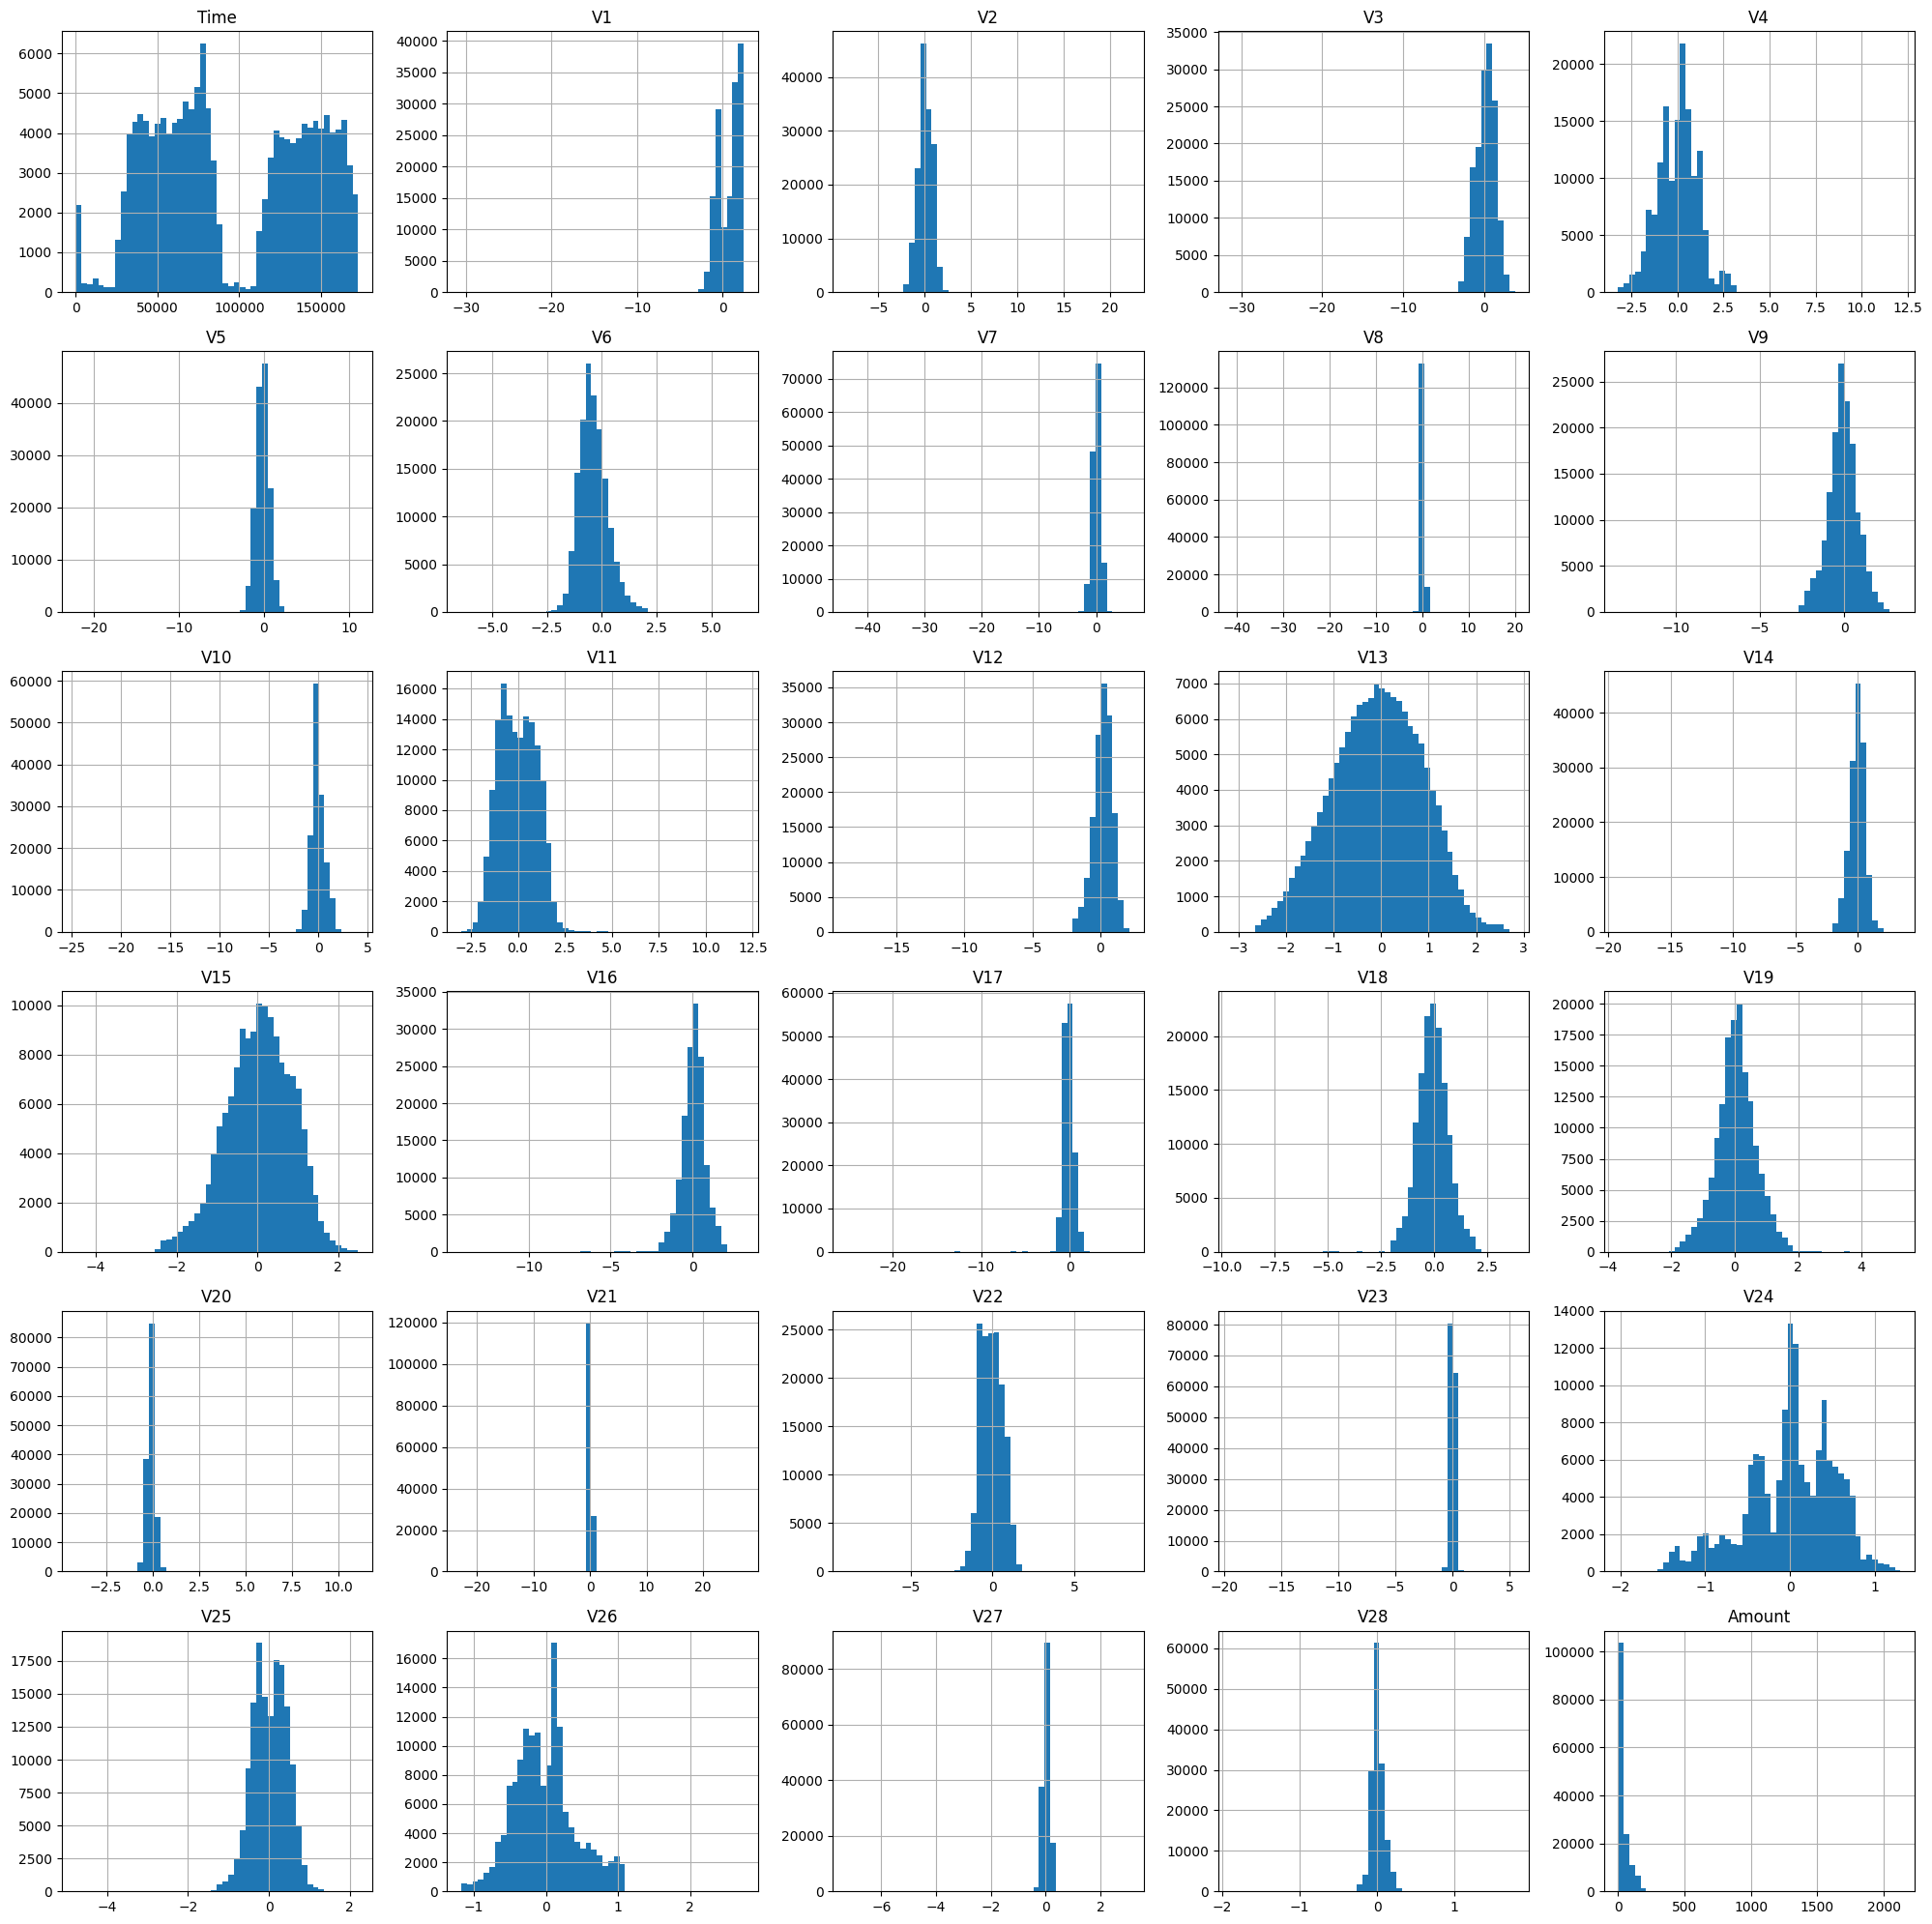

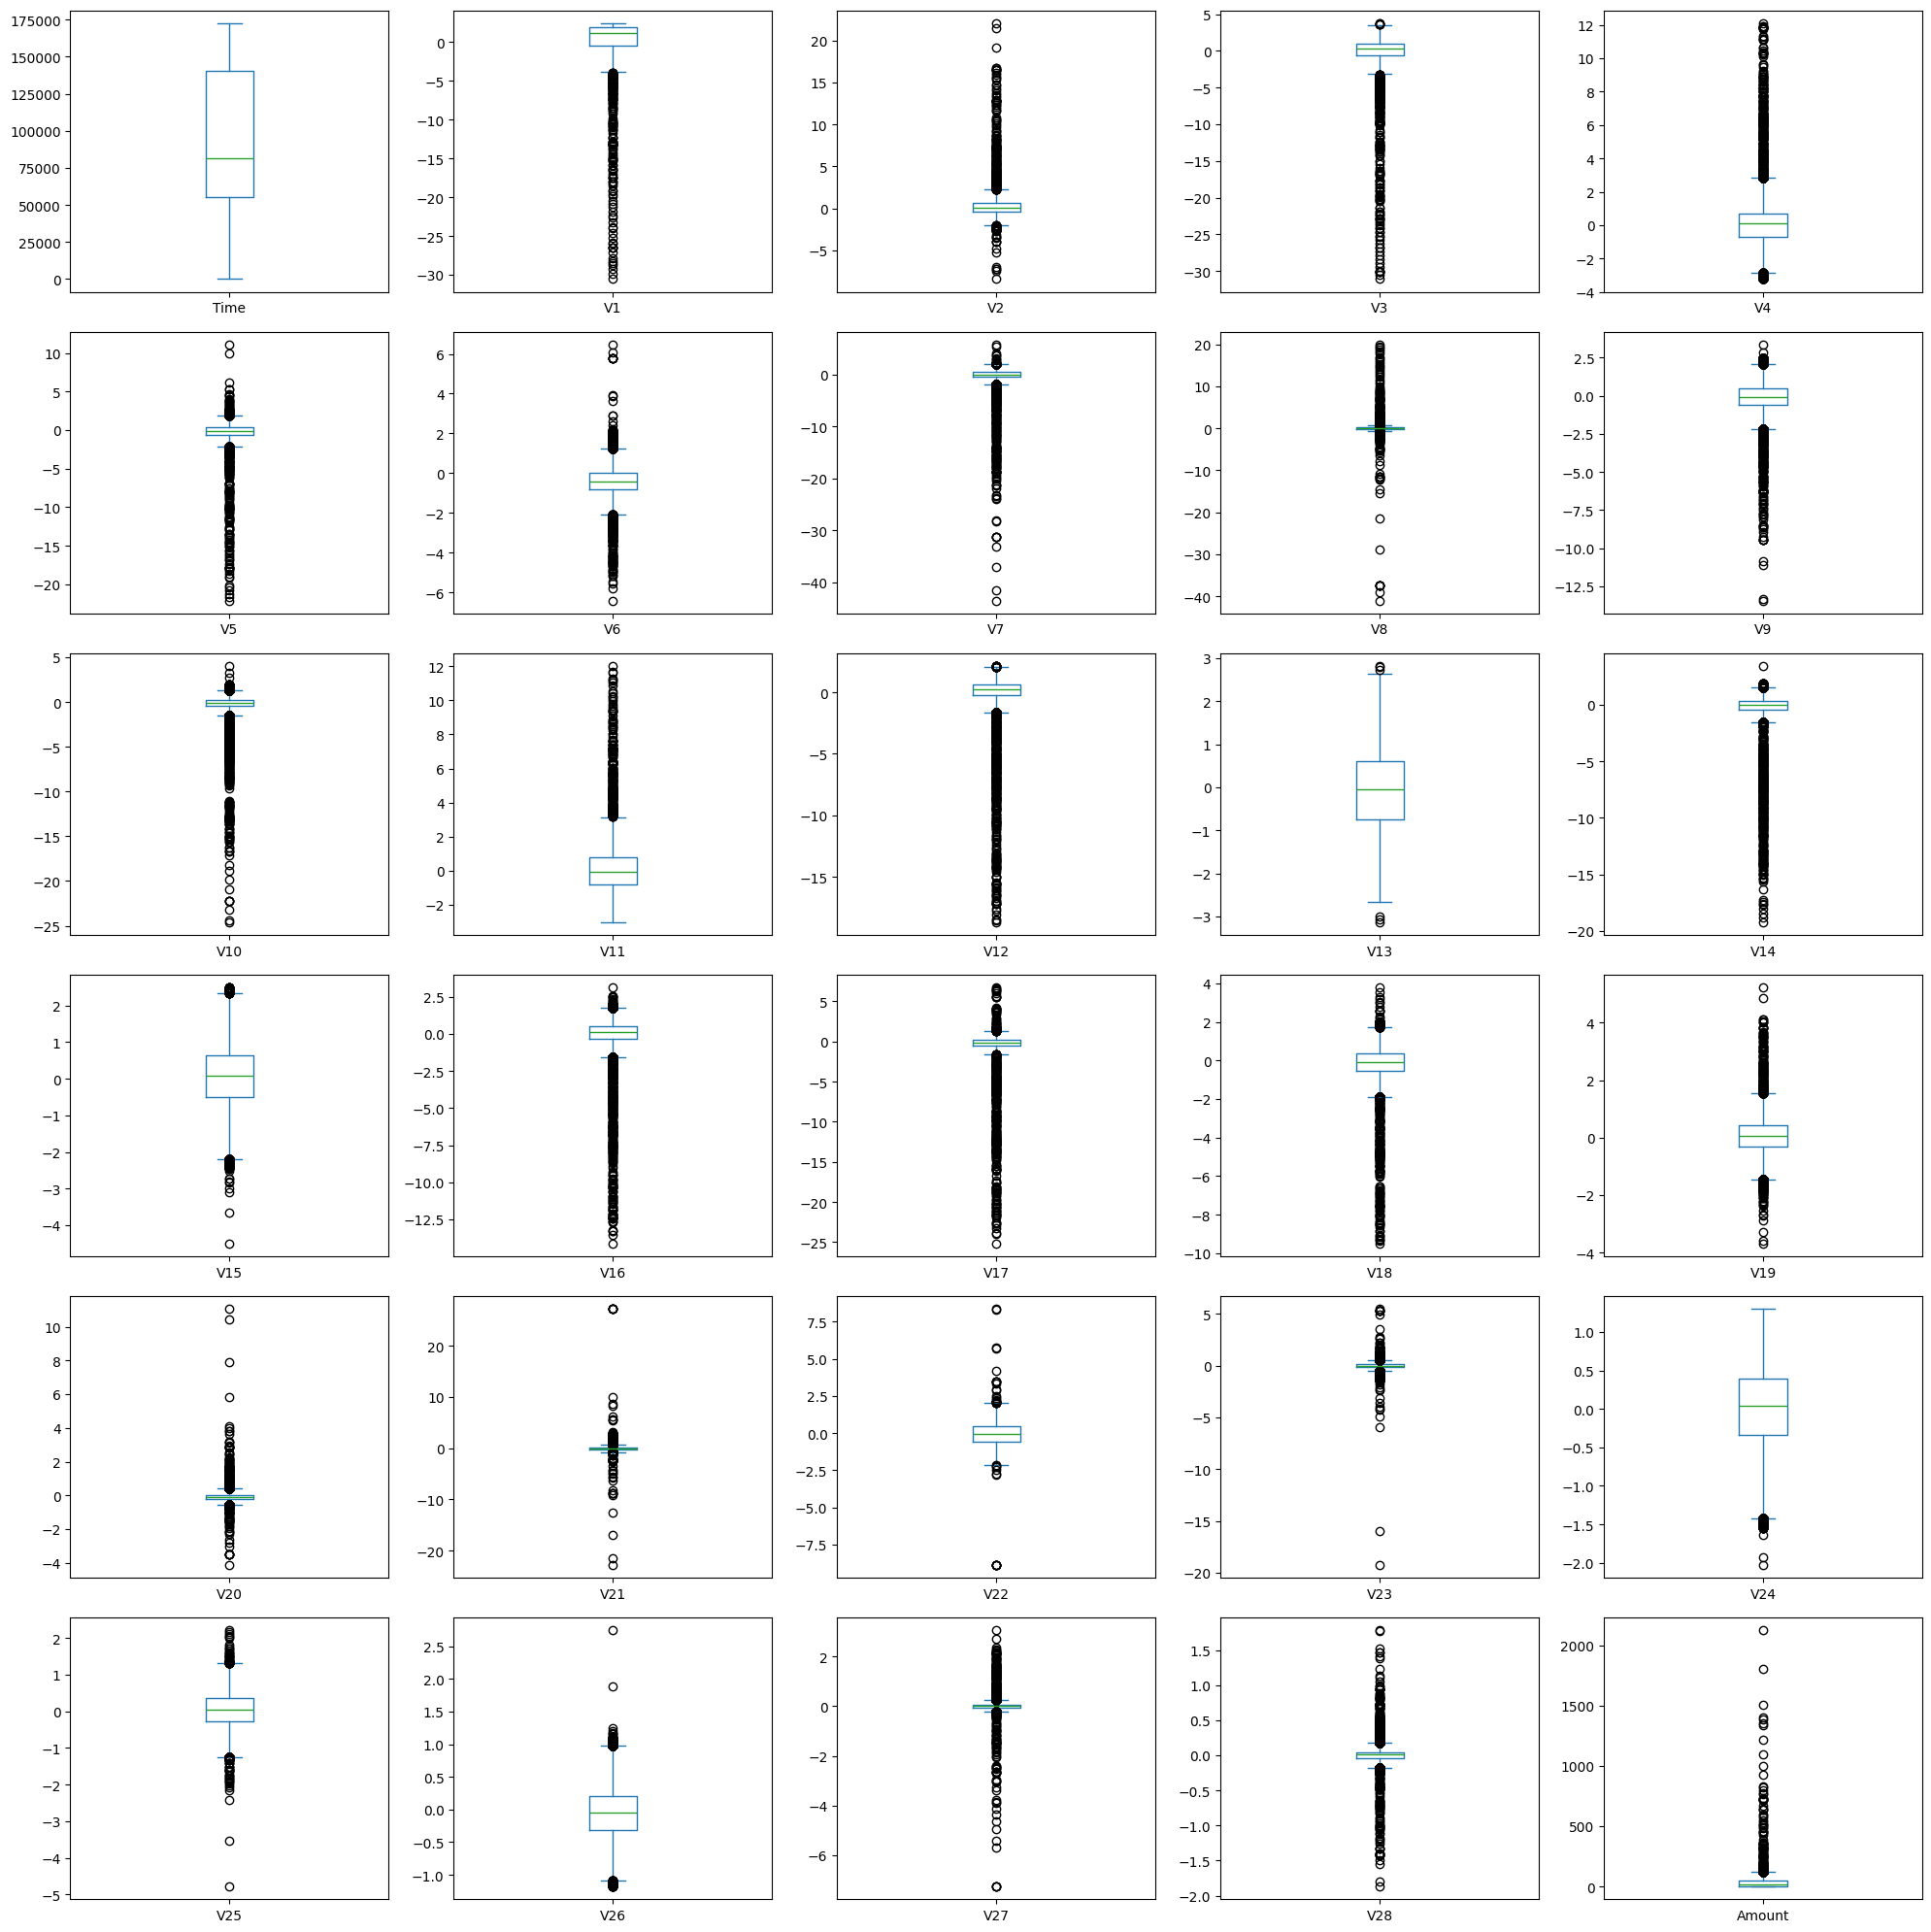

In [14]:
graficos(df_cleaned)

* Nos cargamos los outliers, debido a que el dataset ya venia con un PCA y las caracteristicas carecian que de interpretabilidad.

In [15]:
# Calcular la asimetría (skew) para las columnas numéricas
skew_values = df_cleaned.select_dtypes(include=['float64','float']).skew().sort_values(ascending= False)
print(skew_values)

V21       17.100646
Amount     4.329037
V20        3.054366
V2         1.900414
V11        0.482432
V6         0.451770
V4         0.444943
V26        0.327441
Time       0.040953
V22        0.027846
V19       -0.006479
V28       -0.050497
V13       -0.083582
V25       -0.143694
V15       -0.259982
V9        -0.426478
V24       -0.549835
V18       -0.566446
V16       -2.377156
V1        -2.565851
V5        -2.729233
V3        -3.063874
V10       -4.434151
V12       -4.665763
V14       -5.590669
V27       -6.249142
V23       -7.308582
V7        -9.097056
V17       -9.864922
V8       -21.458855
dtype: float64


In [16]:
# Filtrar las filas donde Class es igual a 1
df_class_1 = df[df['Class'] == 1]

# Calcular los outliers para cada columna
outliers_count = ((df_class_1 < (Q1 - 1.5 * IQR)) | (df_class_1 > (Q3 + 1.5 * IQR))).sum()

# Mostrar el número de outliers por columna
print(outliers_count)

Time        0
V1        174
V2        246
V3        312
V4        318
V5        208
V6        137
V7        301
V8        247
V9        223
V10       399
V11       294
V12       409
V13         8
V14       430
V15        12
V16       351
V17       397
V18       237
V19       135
V20       194
V21       244
V22        28
V23       149
V24         3
V25        55
V26        10
V27       344
V28       272
Amount     91
Class     492
dtype: int64


### Grafico de Correlaciones

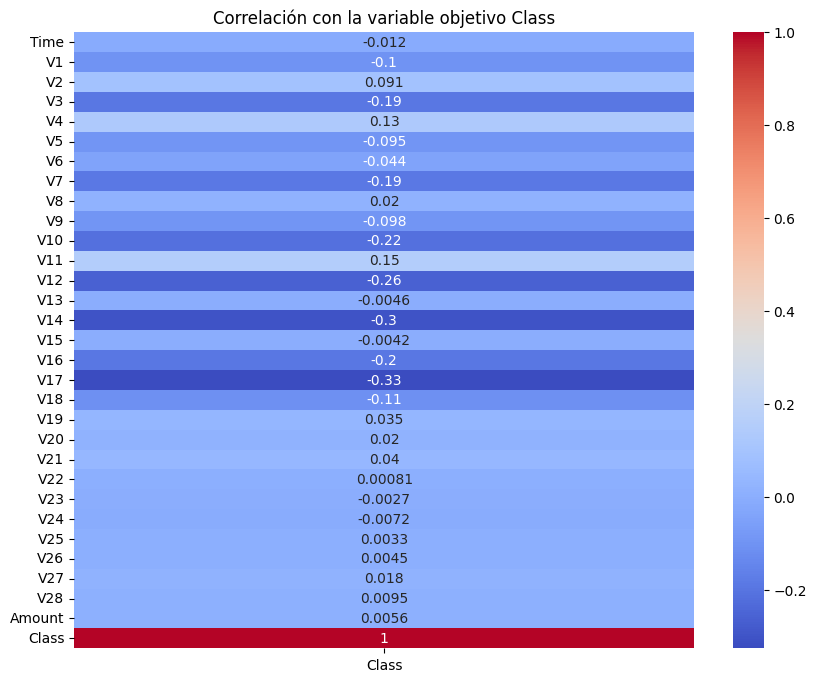

In [17]:
# Crear una matriz de correlación para las columnas numéricas
correlation_matrix = df.corr()

# Filtrar las correlaciones relacionadas con la variable objetivo 'Class'
correlation_with_class = correlation_matrix[['Class']]

# Crear un mapa de calor con seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_with_class, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlación con la variable objetivo Class')
plt.show()

### Correlación con Spearman

In [18]:
spearman_correlation = df.corr(method='spearman')
spearman_correlation_with_class = spearman_correlation[['Class']]
spearman_correlation_with_class.style.background_gradient(cmap='coolwarm')
spearman_correlation_with_class_sorted = spearman_correlation_with_class.sort_values(by='Class', ascending=False)
spearman_correlation_with_class_sorted.style.background_gradient(cmap='coolwarm')

,Class
Class,1.000000
V4,0.063045
V11,0.060143
V2,0.051062
V21,0.035442
V27,0.028311
V8,0.022706
V19,0.022546
V20,0.021574
V28,0.020417


In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Escalar los datos para que tengan media 0 y desviación estándar 1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned.drop(columns=['Class','Time','Amount']))

# Aplicar PCA para reducir a 5 componentes
pca = PCA(n_components=5)
pca_result = pca.fit_transform(scaled_data)

# Crear un DataFrame con los resultados de la PCA
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(5)])
pca_df[['Class','Time','Amount']] = df_cleaned[['Class','Time','Amount']].reset_index(drop=True)

# Mostrar la varianza explicada por cada componente
print(f'Varianza explicada por cada componente: {pca.explained_variance_ratio_}')
print(f'Varianza explicada acumulada: {pca.explained_variance_ratio_.cumsum()}')

pca_df.shape

Varianza explicada por cada componente: [0.11510863 0.09359642 0.07706047 0.06844853 0.06125043]
Varianza explicada acumulada: [0.11510863 0.20870505 0.28576552 0.35421406 0.41546449]


(146811, 8)

In [40]:
variances_cleaned = df_cleaned.drop(columns=['Class','Time','Amount']).var()
explained_ratio_cleaned = variances_cleaned / variances_cleaned.sum()
cumulative_variance_cleaned = np.array(np.cumsum(explained_ratio_cleaned))

print(f'Varianza explicada por cada componente: {explained_ratio_cleaned}')



Varianza explicada por cada componente: V1     0.103816
V2     0.042184
V3     0.107451
V4     0.076638
V5     0.044101
V6     0.026329
V7     0.045966
V8     0.015590
V9     0.049116
V10    0.039423
V11    0.064187
V12    0.042361
V13    0.055435
V14    0.036160
V15    0.041055
V16    0.035067
V17    0.037285
V18    0.033068
V19    0.023639
V20    0.002664
V21    0.006868
V22    0.027650
V23    0.002853
V24    0.016759
V25    0.011198
V26    0.011515
V27    0.001169
V28    0.000456
dtype: float64


In [41]:
print(f'Varianza explicada acumulada: {cumulative_variance_cleaned}')

Varianza explicada acumulada: [0.10381567 0.14599957 0.25345052 0.33008868 0.37418923 0.40051775
 0.44648331 0.46207373 0.51118926 0.55061221 0.61479876 0.65716023
 0.71259507 0.74875537 0.78981037 0.82487747 0.86216255 0.89523015
 0.91886891 0.92153294 0.92840079 0.95605055 0.95890386 0.97566252
 0.98686061 0.99837526 0.99954396 1.        ]


In [38]:
pca_cumulative_variance = pca.explained_variance_ratio_.cumsum()


pca_cumulative_variance

array([0.11510863, 0.20870505, 0.28576552, 0.35421406, 0.41546449])

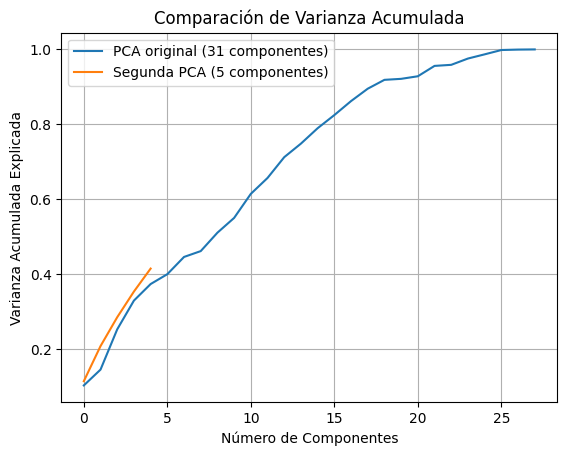

In [37]:

plt.plot(cumulative_variance_cleaned, label='PCA original (31 componentes)')
plt.plot(pca_cumulative_variance, label='Segunda PCA (5 componentes)')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada Explicada')
plt.legend()
plt.title('Comparación de Varianza Acumulada')
plt.grid(True)
plt.show()

Como vemos, perdemos el 60% de nuestra varianza acumulada por lo que no conviene efectuar un pca a 5 componentes. Nos mantendermos con el dataset original de 31 caracteristicas....

In [22]:
pca_df.corr().style.background_gradient(cmap='coolwarm')

,PC1,PC2,PC3,PC4,PC5,Class,Time,Amount
PC1,1.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.373729,0.210635,0.061013
PC2,-0.000000,1.000000,0.000000,-0.000000,0.000000,-0.625857,0.029301,-0.162399
PC3,-0.000000,0.000000,1.000000,0.000000,0.000000,-0.150475,-0.265330,0.203872
PC4,0.000000,-0.000000,0.000000,1.000000,-0.000000,0.100208,0.123577,0.030970
PC5,-0.000000,0.000000,0.000000,-0.000000,1.000000,0.010752,0.009640,-0.028988
Class,-0.373729,-0.625857,-0.150475,0.100208,0.010752,1.000000,-0.018319,0.113146
Time,0.210635,0.029301,-0.265330,0.123577,0.009640,-0.018319,1.000000,-0.028198
Amount,0.061013,-0.162399,0.203872,0.030970,-0.028988,0.113146,-0.028198,1.000000


In [23]:
# sns.pairplot(pca_df, hue='Class', diag_kind='kde', palette='coolwarm')
# plt.show()

In [3]:
train_path = os.path.join('..', 'data', 'out', 'train.csv')
test_path = os.path.join('..', 'data', 'out', 'test.csv')
val_path = os.path.join('..', 'data', 'out', 'val.csv')

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
val_df = pd.read_csv(val_path)

In [4]:
train_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,205772.000000,205772.000000,205772.000000,205772.000000,205772.000000,205772.000000,205772.000000,205772.000000,205772.000000,205772.000000,...,205772.000000,205772.000000,205772.000000,205772.000000,205772.000000,205772.000000,205772.000000,205772.000000,205772.000000,205772.000000
mean,94869.099358,0.000084,0.000174,0.001006,-0.002502,-0.000031,0.000412,0.001346,0.001374,0.000382,...,-0.000251,0.000418,0.000321,0.000785,-0.000847,0.000544,-0.000365,0.000167,88.242587,0.001725
std,47513.048601,1.954303,1.635252,1.519113,1.415641,1.385150,1.332738,1.245270,1.193229,1.098472,...,0.735537,0.724914,0.618934,0.605565,0.520403,0.481960,0.405613,0.332085,248.329839,0.041500
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-22.565679,-15.430084,0.000000,0.000000
25%,54183.000000,-0.920551,-0.598683,-0.889391,-0.849820,-0.691834,-0.767726,-0.553908,-0.207590,-0.642038,...,-0.228297,-0.542256,-0.161942,-0.354117,-0.317057,-0.326263,-0.070894,-0.052955,5.640000,0.000000
50%,84783.000000,0.014251,0.065201,0.182121,-0.022012,-0.053953,-0.273894,0.041211,0.023641,-0.050024,...,-0.029681,0.006129,-0.011023,0.041124,0.014483,-0.050970,0.001378,0.011200,22.000000,0.000000
75%,139411.000000,1.314812,0.806955,1.028672,0.741535,0.612741,0.398664,0.572152,0.328997,0.598099,...,0.186077,0.529278,0.147433,0.439835,0.349394,0.241748,0.091183,0.078105,77.800000,0.000000
max,172792.000000,2.451888,22.057729,9.382558,16.715537,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,6.070850,3.517346,31.612198,33.847808,25691.160000,1.000000


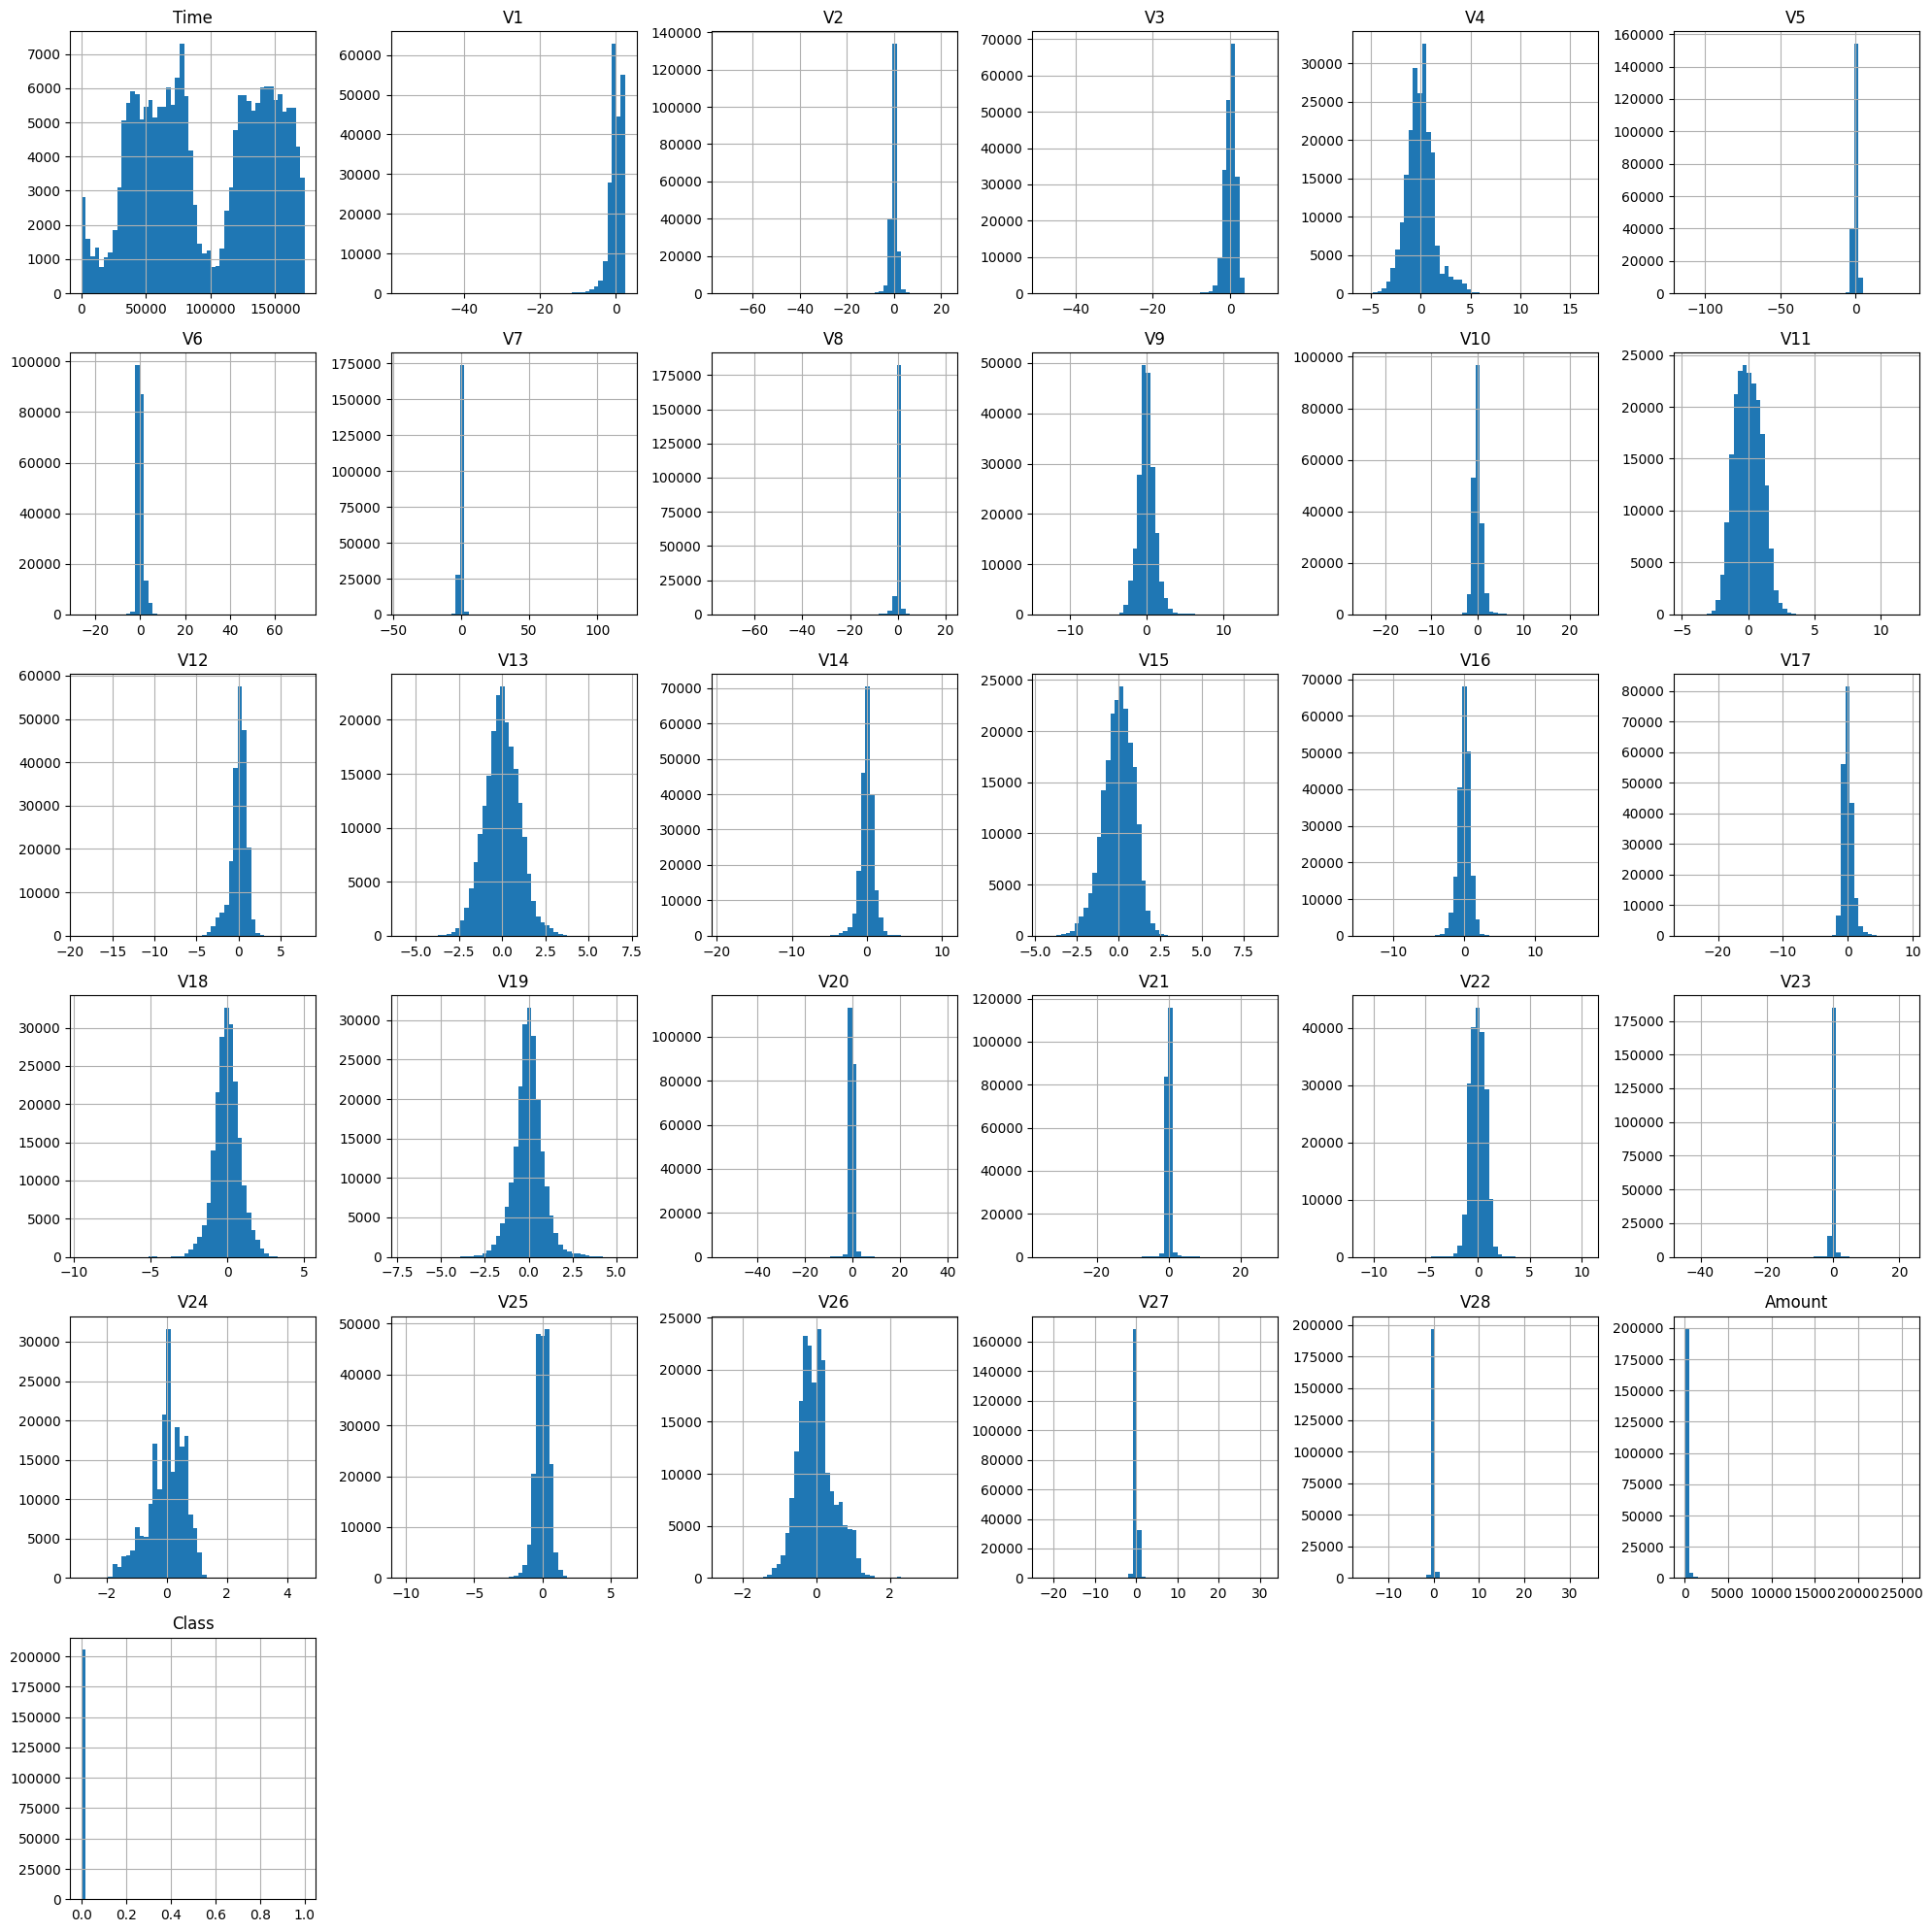

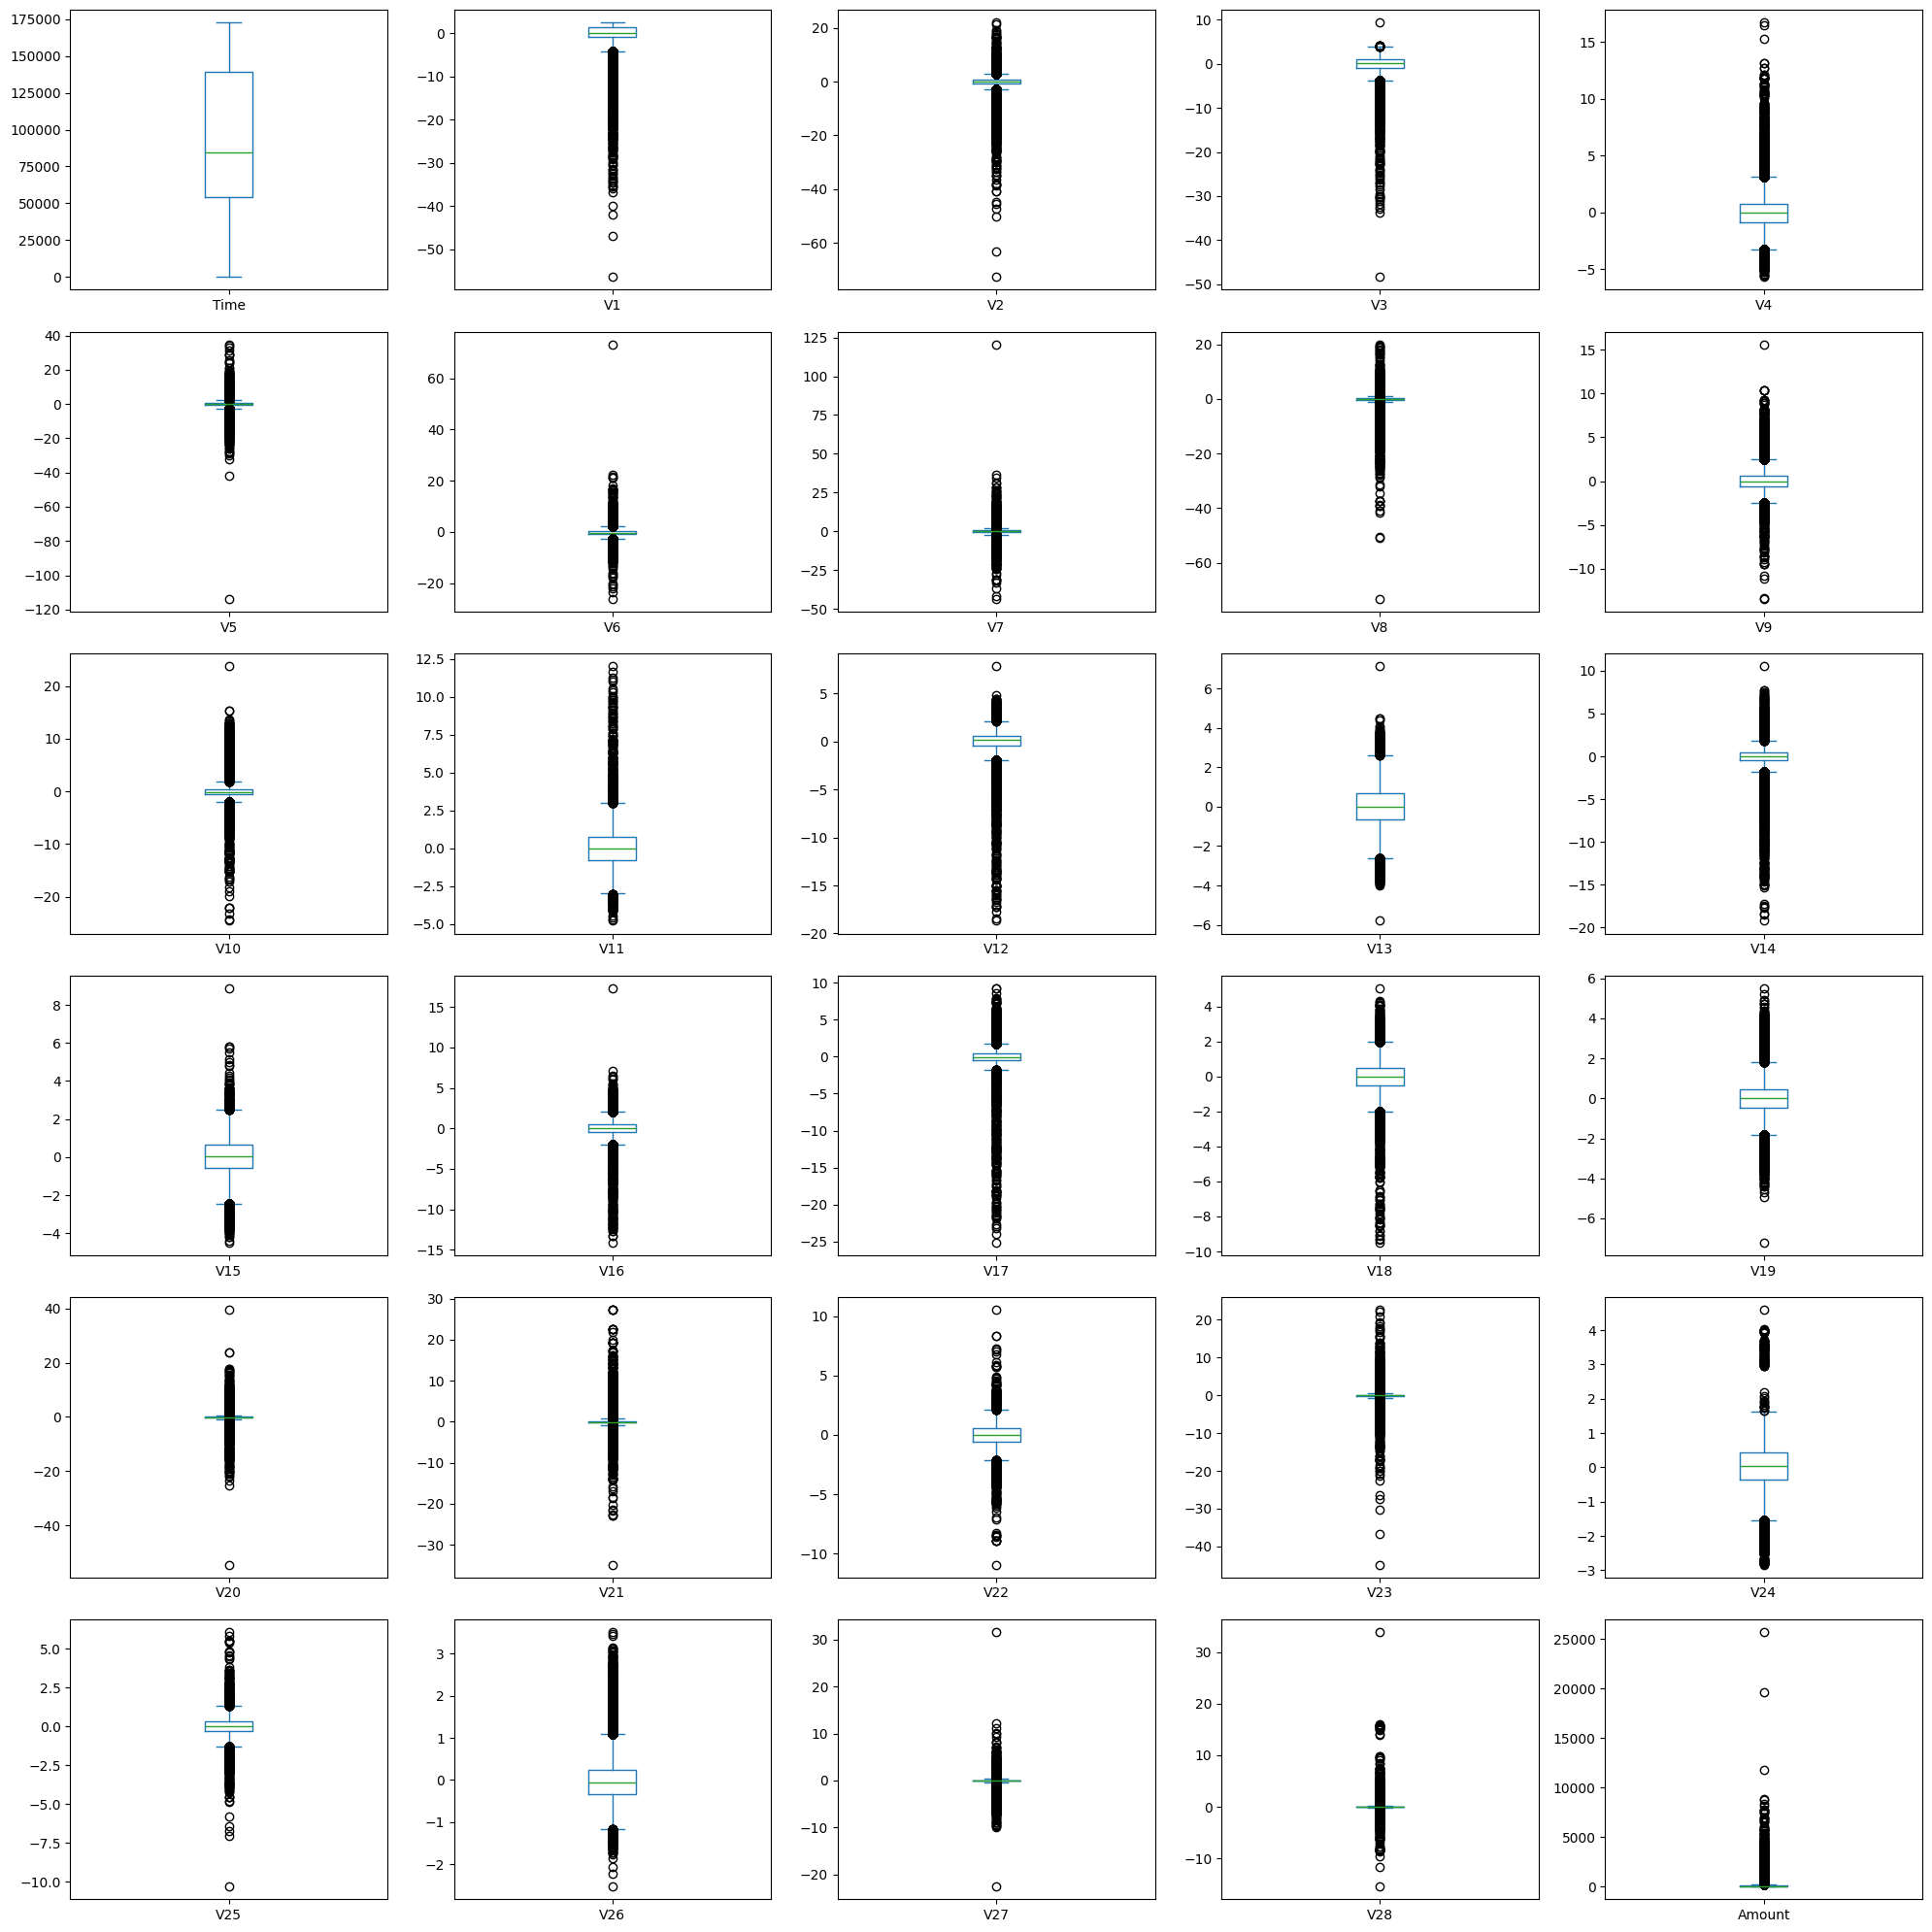

In [11]:
graficos(train_df)

In [5]:
test_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,42722.000000,42722.000000,42722.000000,42722.000000,42722.000000,42722.000000,42722.000000,42722.000000,42722.000000,42722.000000,...,42722.000000,42722.000000,42722.000000,42722.000000,42722.000000,42722.000000,42722.000000,42722.000000,42722.000000,42722.000000
mean,94616.279434,-0.004340,0.001846,-0.005117,-0.000551,0.003482,0.003034,-0.003991,-0.000003,-0.004735,...,-0.002042,0.000328,-0.002594,-0.000760,0.004393,-0.000736,0.000453,-0.000018,88.743145,0.001732
std,47476.387437,1.972130,1.688512,1.522026,1.420531,1.398450,1.347110,1.252556,1.205639,1.100863,...,0.724287,0.724864,0.619852,0.606537,0.522533,0.483496,0.399793,0.341599,251.027484,0.041583
min,2.000000,-37.558067,-42.172688,-30.177317,-5.231828,-40.427726,-19.996349,-31.197329,-50.688419,-9.481456,...,-22.757540,-8.555808,-26.751119,-2.807897,-7.495741,-1.577118,-9.845808,-8.412267,0.000000,0.000000
25%,54209.750000,-0.921762,-0.595823,-0.890651,-0.860164,-0.687748,-0.771932,-0.555918,-0.211985,-0.655066,...,-0.228677,-0.541513,-0.162465,-0.354823,-0.318172,-0.328103,-0.071475,-0.053241,5.490000,0.000000
50%,84540.500000,0.018068,0.067916,0.176219,-0.014324,-0.053226,-0.277042,0.035193,0.018847,-0.052920,...,-0.029681,0.009936,-0.012383,0.040643,0.021689,-0.055786,0.000853,0.011272,22.000000,0.000000
75%,139146.000000,1.316848,0.796185,1.023758,0.749082,0.618905,0.402399,0.564547,0.326803,0.595275,...,0.188674,0.531328,0.148624,0.441566,0.356235,0.241305,0.090714,0.080169,75.900000,0.000000
max,172786.000000,2.454930,16.497472,4.226108,11.927512,28.762671,23.917837,44.054461,17.573712,9.125535,...,22.599543,8.272233,15.879421,3.640662,7.519589,3.116200,10.507884,22.620072,12910.930000,1.000000


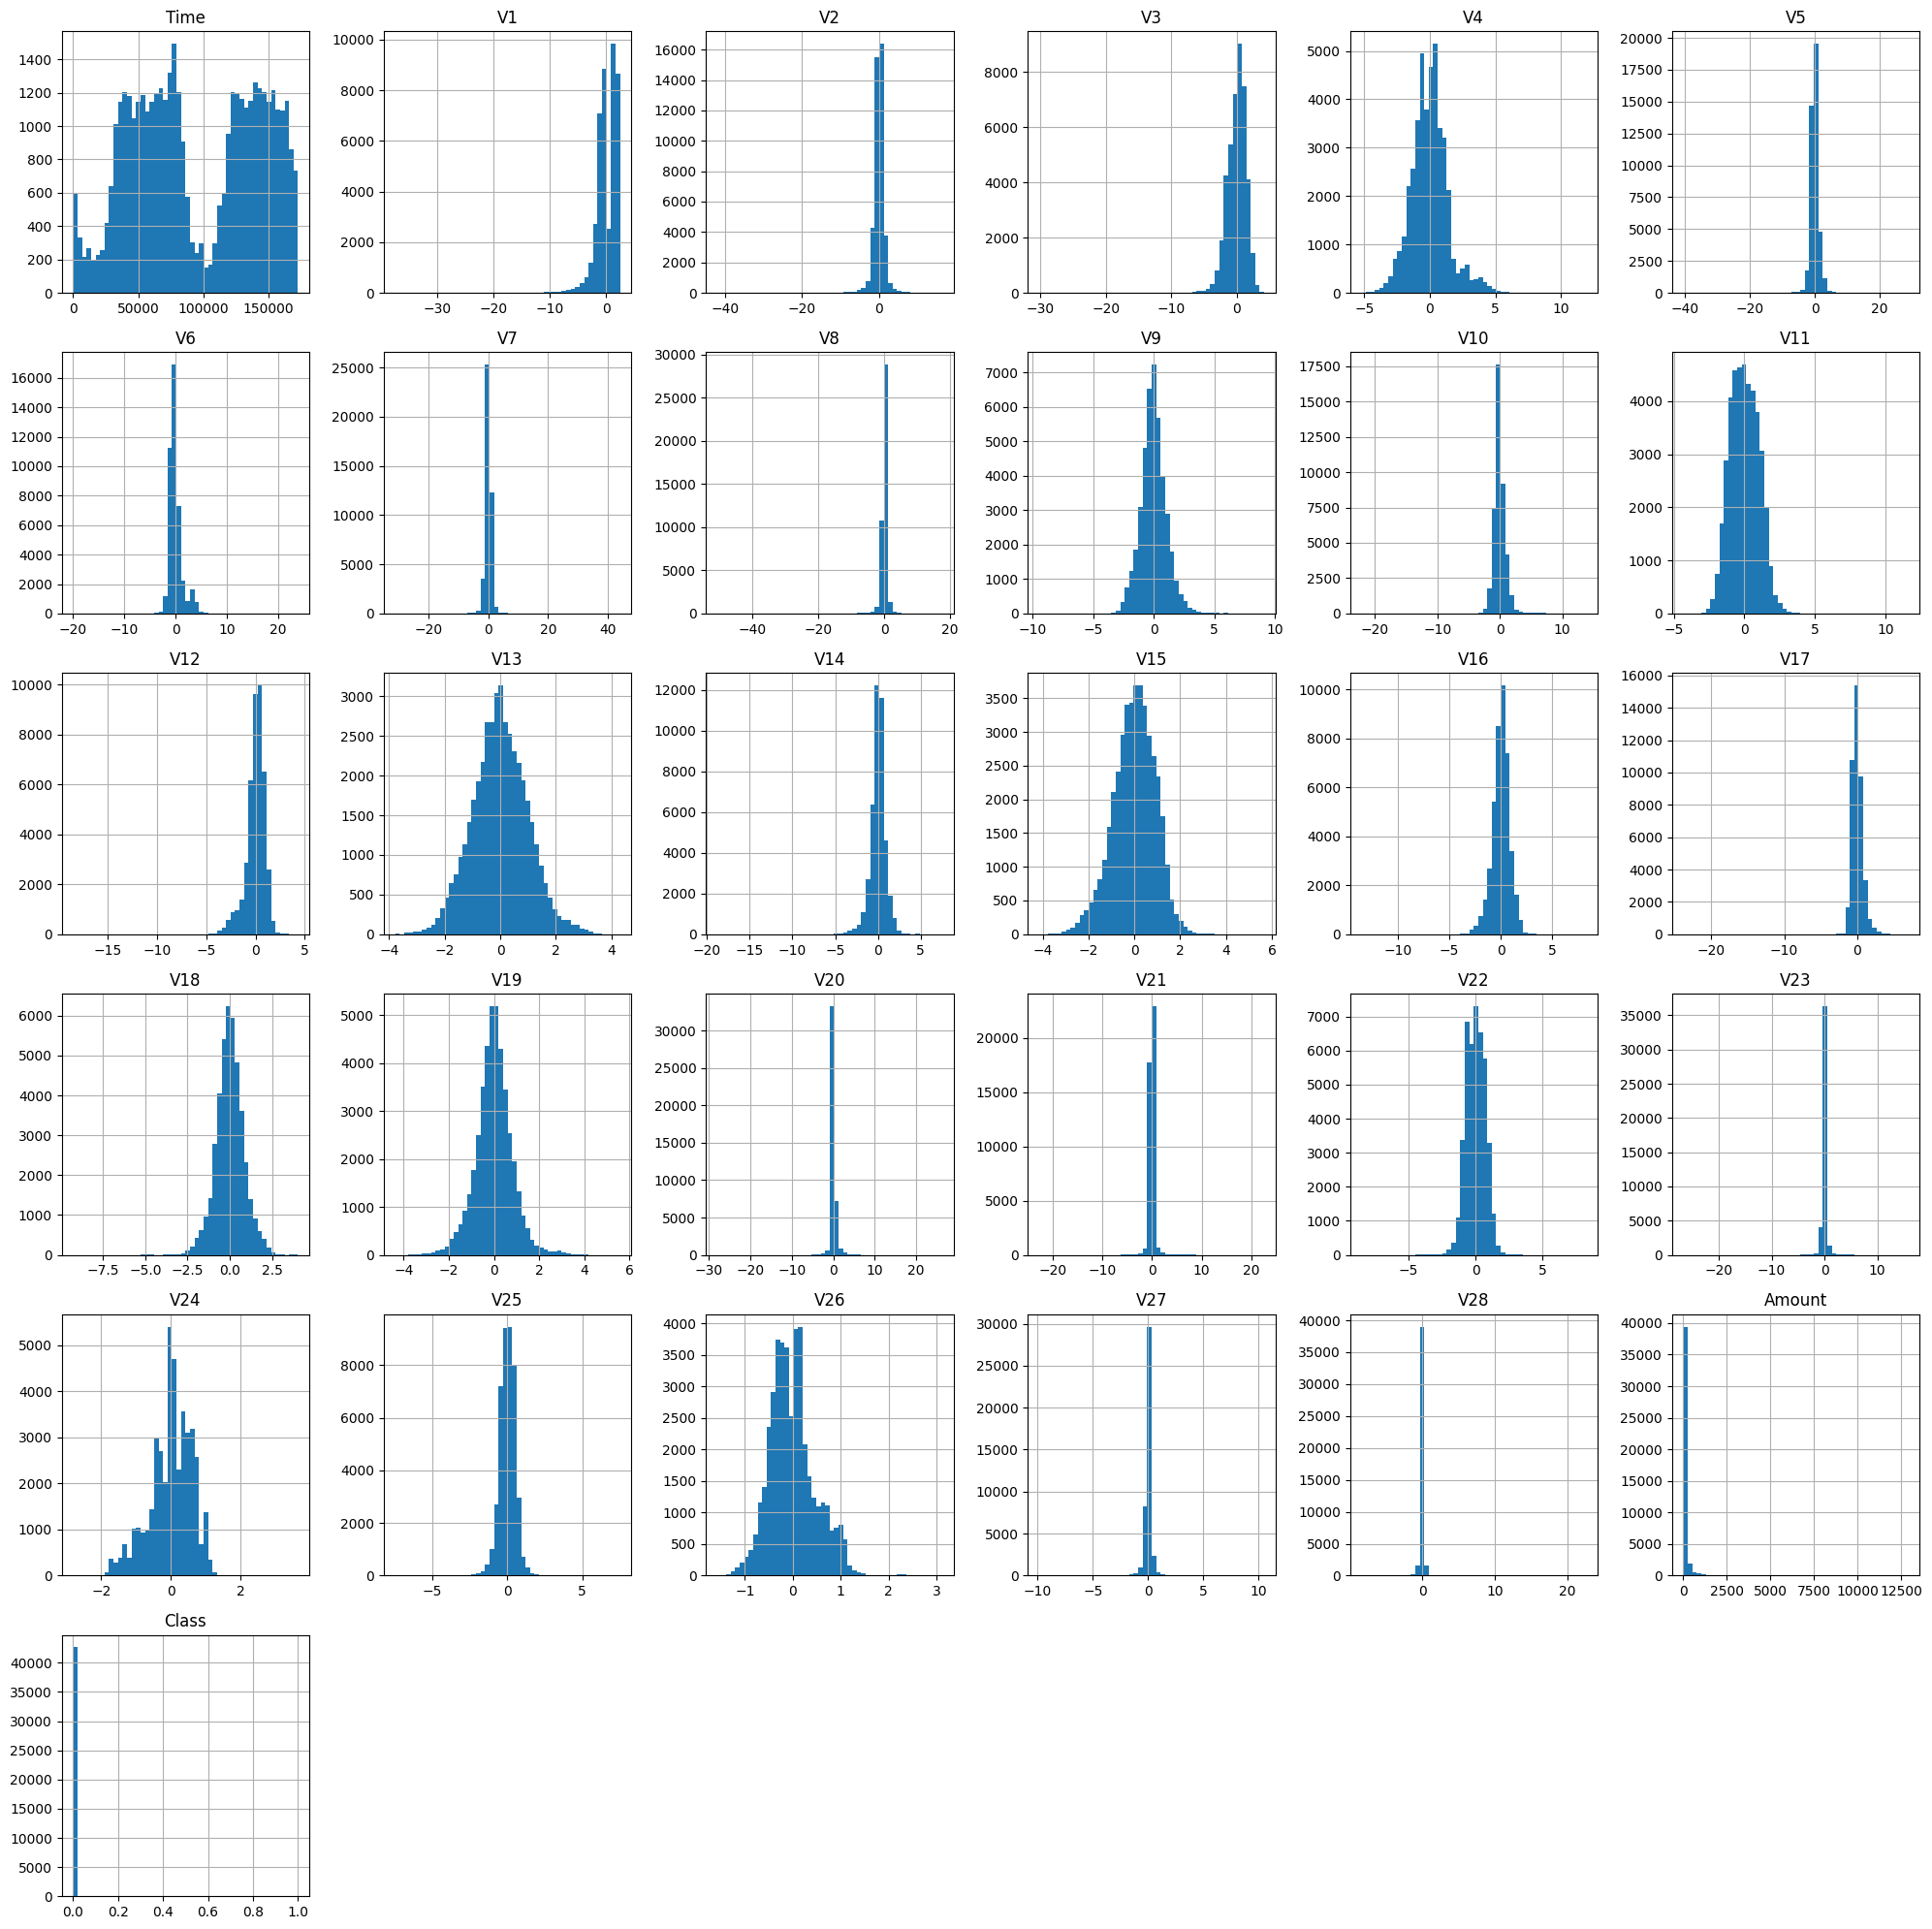

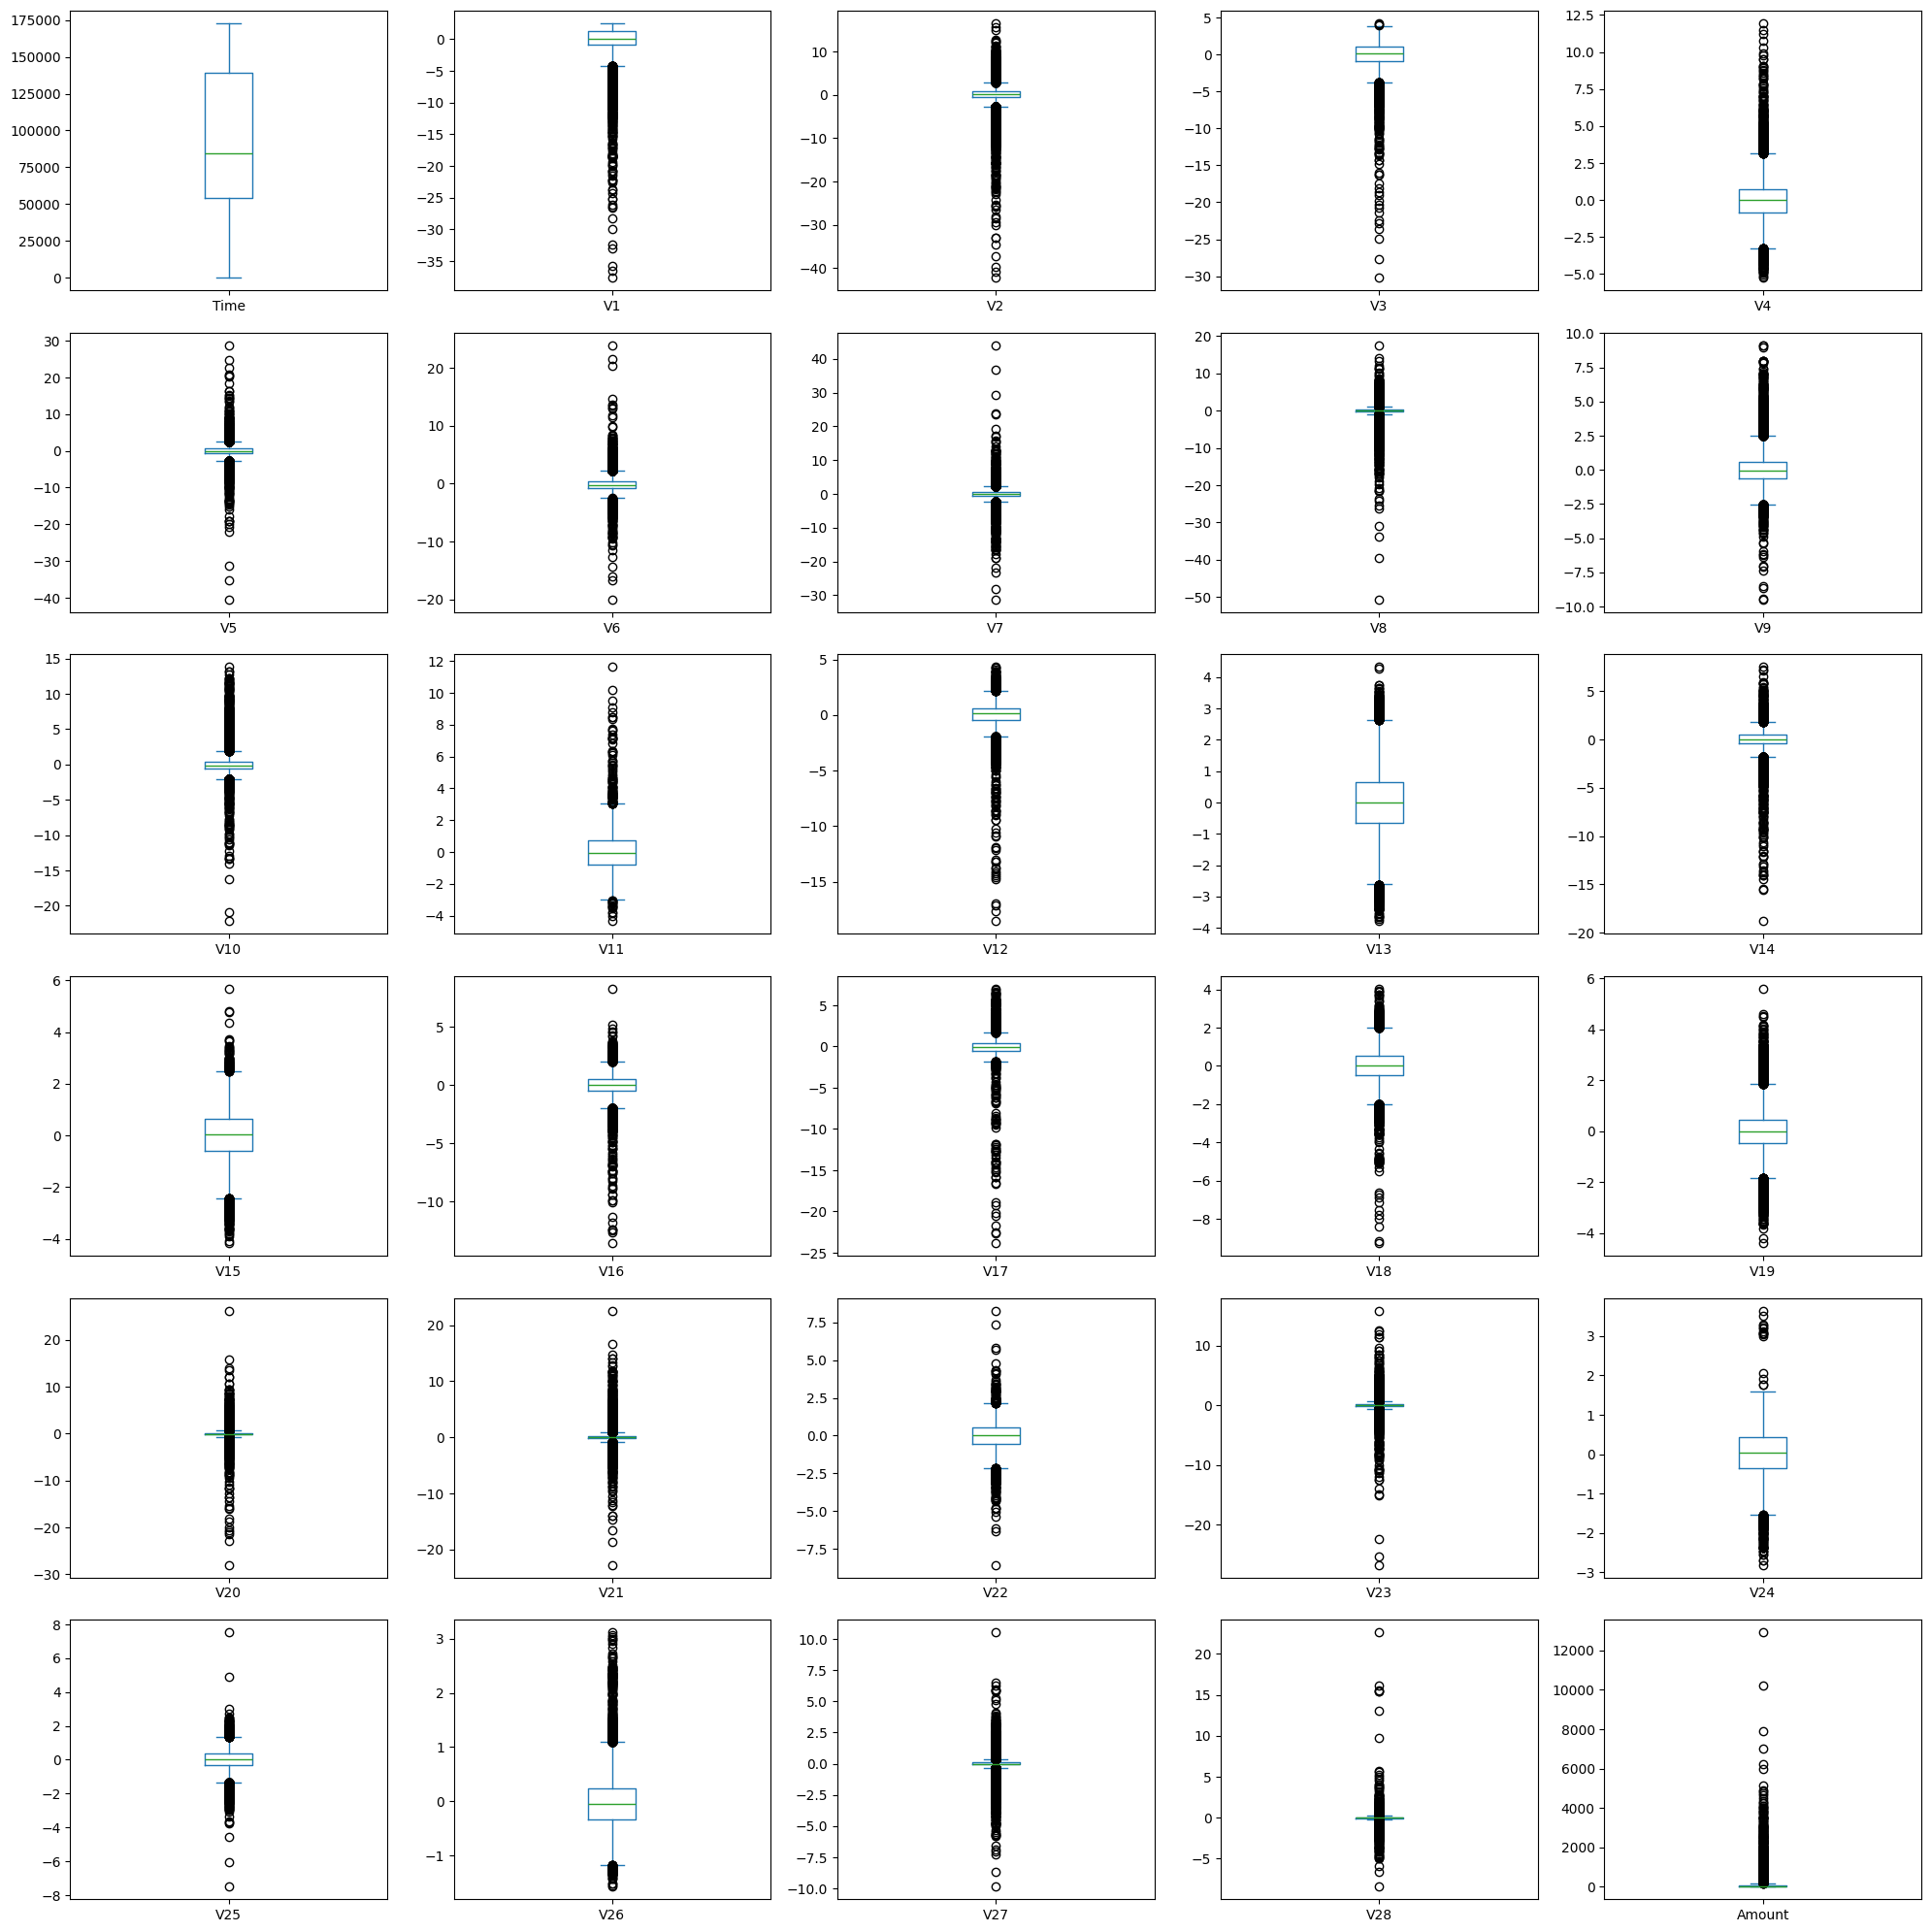

In [10]:
graficos(test_df)

In [6]:
val_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,36313.000000,36313.000000,36313.000000,36313.000000,36313.000000,36313.000000,36313.000000,36313.000000,36313.000000,36313.000000,...,36313.000000,36313.000000,36313.000000,36313.000000,36313.000000,36313.000000,36313.000000,36313.000000,36313.000000,36313.000000
mean,94733.288382,0.004631,-0.003156,0.000318,0.014827,-0.003921,-0.005903,-0.002929,-0.007784,0.003407,...,0.003824,-0.002755,0.001231,-0.003553,-0.000368,-0.002215,0.001536,-0.000927,88.493150,0.001735
std,47361.228237,1.967725,1.697002,1.493094,1.411605,1.329965,1.311933,1.170530,1.187362,1.096925,...,0.740721,0.731138,0.660038,0.605065,0.524734,0.482249,0.396825,0.303890,259.007801,0.041617
min,0.000000,-40.470142,-60.464618,-28.923756,-5.416315,-20.399897,-20.869626,-19.210896,-37.353443,-6.329801,...,-14.058810,-9.499423,-32.828995,-2.740677,-8.696627,-2.604551,-8.260909,-8.478686,0.000000,0.000000
25%,54297.000000,-0.916356,-0.600843,-0.895766,-0.828133,-0.694868,-0.767712,-0.552775,-0.209784,-0.635343,...,-0.228868,-0.543768,-0.160700,-0.356628,-0.316395,-0.330170,-0.069866,-0.052688,5.660000,0.000000
50%,84591.000000,0.037287,0.064495,0.172729,-0.012341,-0.057623,-0.273383,0.039279,0.018867,-0.054799,...,-0.028247,0.006637,-0.010594,0.040628,0.023054,-0.053994,0.001717,0.011578,22.000000,0.000000
75%,139048.000000,1.319983,0.794408,1.022580,0.745710,0.600400,0.393847,0.566399,0.318948,0.593844,...,0.185643,0.523193,0.147638,0.436138,0.352505,0.236123,0.090774,0.077283,76.190000,0.000000
max,172785.000000,2.408683,15.598193,3.971381,16.875344,26.647697,14.793318,24.422716,18.329406,10.313974,...,27.202839,5.376029,18.946734,3.948061,5.852484,3.220178,8.932639,15.866721,18910.000000,1.000000


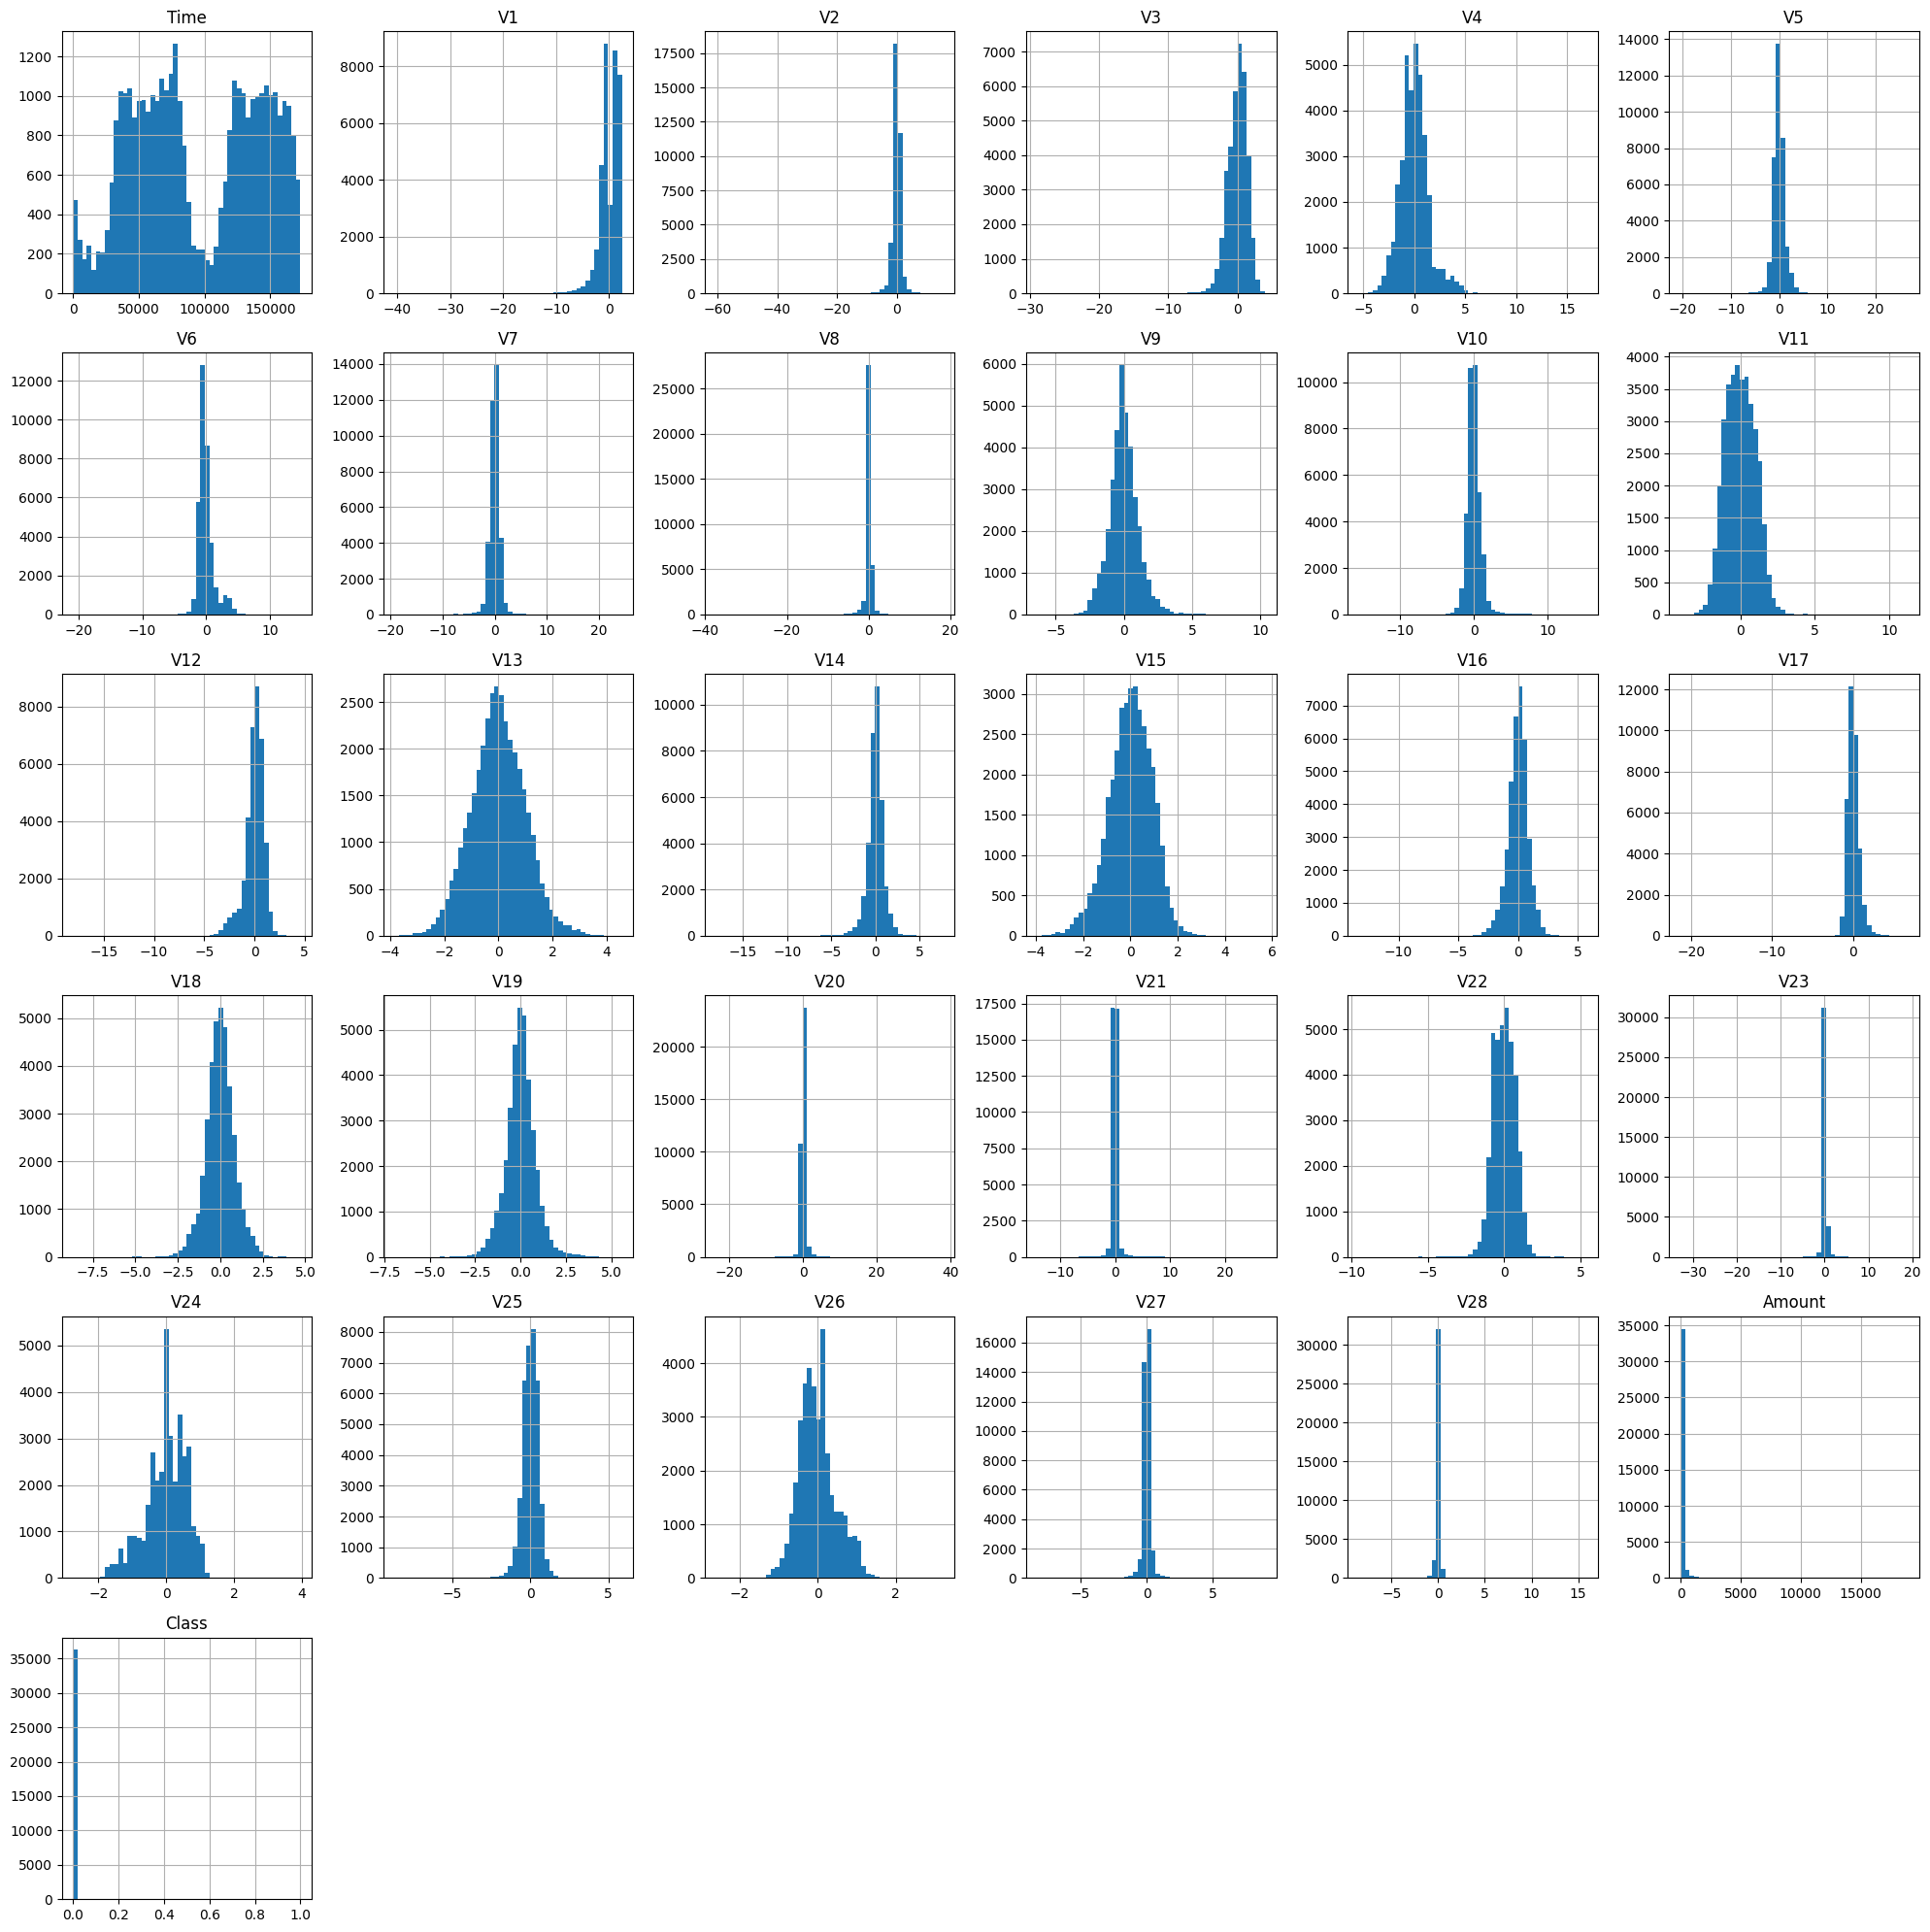

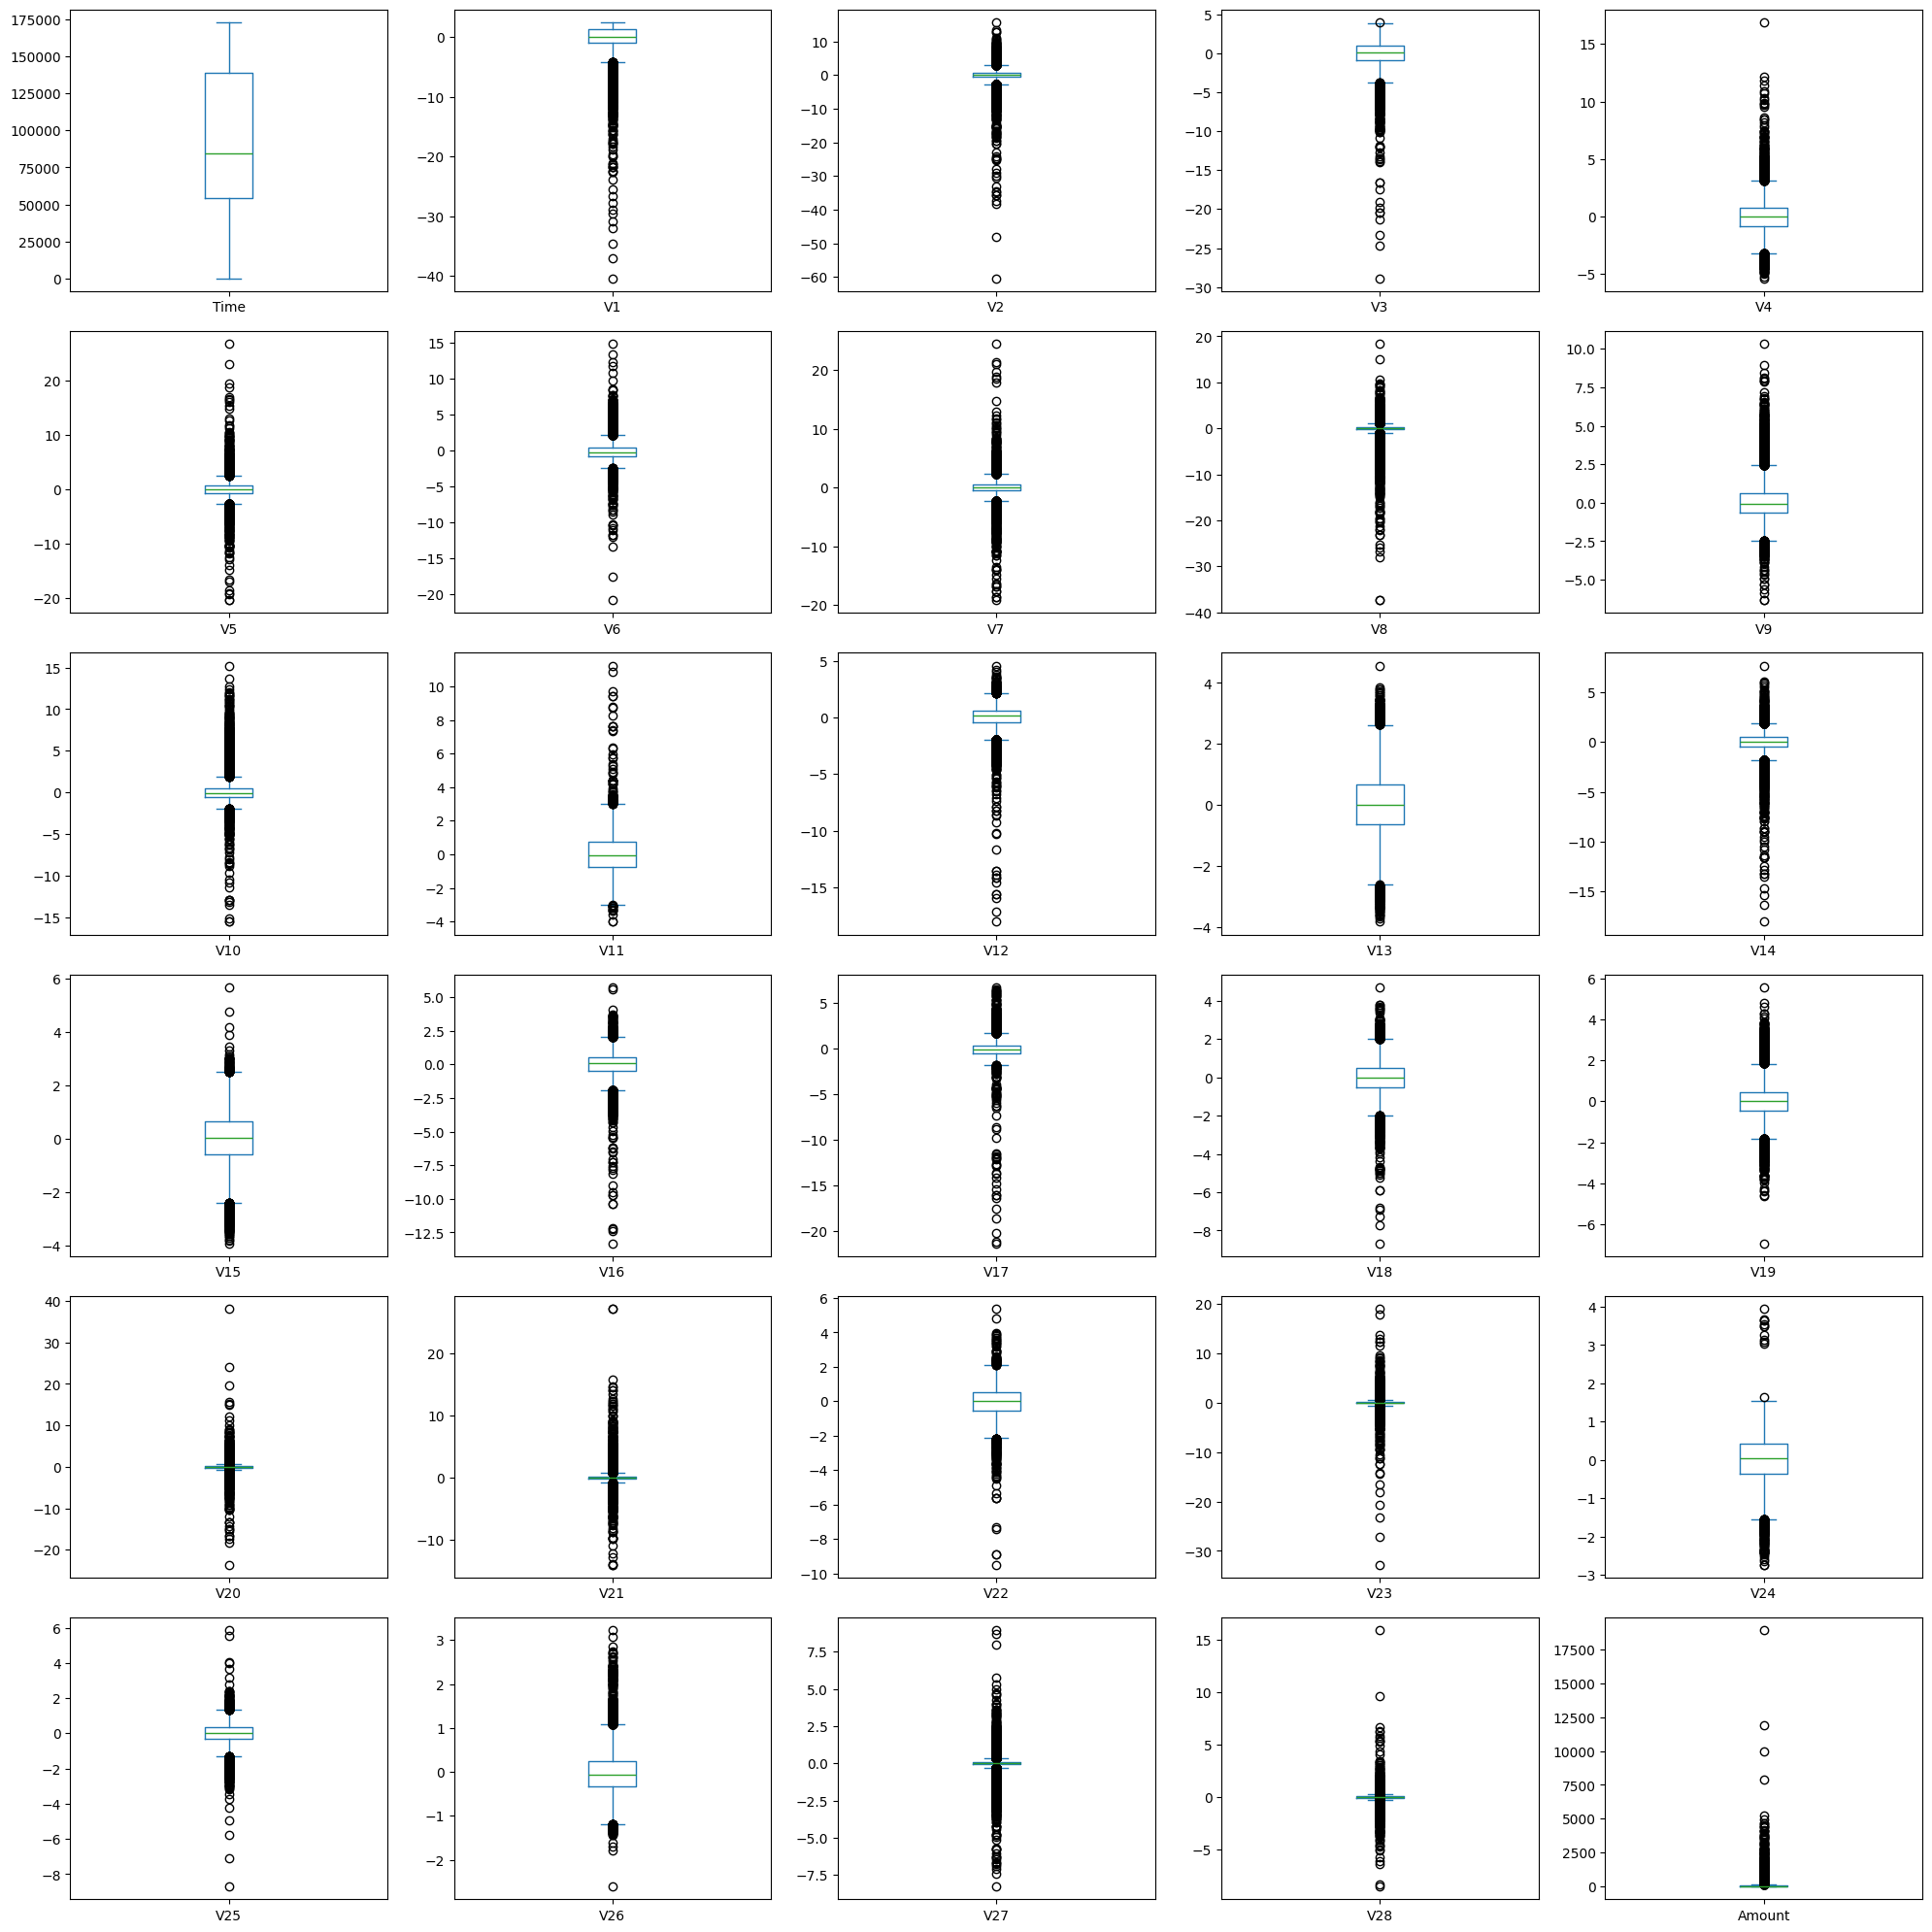

In [9]:
graficos(val_df)